In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import timeit
import math
from numba import jit
from PIL import Image

In [2]:
!pip install gdown
import gdown
supermario_path = 'https://drive.google.com/uc?id=14SQwOXcNzCseSvHWgpLDwv3-C16JTZpB'
mario_path = 'https://drive.google.com/uc?id=16WybrWHRrxXXIlv9fK7u4kdMYNHWY7H1'
gdown.download(supermario_path, 'super_mario.jpg', quiet=False)
gdown.download(mario_path, 'mario.png', quiet=False)


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Downloading...
From: https://drive.google.com/uc?id=14SQwOXcNzCseSvHWgpLDwv3-C16JTZpB
To: /Users/pedranji/Projects/ALC/labo3/super_mario.jpg
100%|██████████| 15.8k/15.8k [00:00<00:00, 410kB/s]
Downloading...
From: https://drive.google.com/uc?id=16WybrWHRrxXXIlv9fK7u4kdMYNHWY7H1
To: /Users/pedranji/Projects/ALC/labo3/mario.png
100%|██████████| 4.15k/4.15k [00:00<00:00, 935kB/s]


'mario.png'

# Transformaciones lineales

## Introducción

Sean $(w, z)$ y $(x, y)$ dos sistemas coordenados, denominados el espacio de entrada y espacio de salida respectivamente.

Una transformación geométrica de coordenadas define al mapeo desde el espacio de entrada al de salida de la forma:

$$(x, y) = T{(w, z)}$$

donde $T {·}$ se llama transformación o mapeo directo. Si $T {·}$ posee una inversa, el mapeo inverso es aquel que traslada los puntos desde el espacio de salida al de entrada:

$$(x, y) = T^{−1}{(w, z)}$$

Las transformaciones geométricas se definen en términos de la transformación de coordenadas


Veamos una animación 🆒
https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&ab_channel=3Blue1Brown

### Ejemplo


La figura muestra el efecto de aplicar la transformación lineal definida por $$(x, y) = T {(w, z)} = (w/2, z/2) $$
 que escala
la curva original encogiéndola a la mitad



🧠 **Para pensar ahora:** ¿Cómo puede definirse esta transformación y su inversa de forma matricial?


### **Spoiler**:



$
\begin{pmatrix} x \\ y \end{pmatrix} =
T \begin{pmatrix} w \\ z \end{pmatrix} =
\begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix} w \\ z \end{pmatrix}
$


$
\begin{pmatrix} w \\ z \end{pmatrix} =
T^{-1} \begin{pmatrix} x \\ y \end{pmatrix} =
\begin{pmatrix}
2 & 0 \\
0 & 2
\end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
$


In [3]:
T = np.array([[0.5, 0],
              [0, 0.5]])

T_inv = np.array([[2,0],
                 [0,2]])

# Chequeamos que son inversa una de la otra (con una tolerancia)
np.allclose(T @ T_inv, np.eye(2))
np.allclose(T_inv @  T, np.eye(2))

True

# Ejercicios "en papel"


## Deformaciones (shears)


En este caso se trasladan las coordenadas horizontales un factor que depende de las verticales. Las coordenadas verticales quedan sin modificación, provocando una deformacion de la salida. Dado un factor $k$, se define una deformación en x como:

$$(x, y) = T {(w, z)} = (w + kz, z) $$

📔 Resolver:

a) Encontrar la expresión de la matriz $T$ y $T^{−1}$

 $$ T = ...$$

 $$ T^{−1} = ... $$

 - T = [[1,1], [k,0]]

b) De forma análoga puede definirse la deformación en y modificando las coordenadas verticales. Encontrar la expresión de la matriz para la transformación y su inversa

 $$ T = ...$$

 $$ T^{−1} = ... $$




## Rotaciones


Sea $R_{\theta} : \mathbb{R}^2 \to \mathbb{R}^2 $ la rotación de un ángulo $\theta$ alrededor del origen como muestra la figura





🧠 **Para pensar ahora:** ¿Cómo podemos definir esta transformación de forma matricial?

**HINT:** Estudiar lo que debería ocurrir con los vectores canónicos. Observar que, además, esta transformación no deforma los vectores (es decir, preserva su norma).

📔 Resolver:

a) Encontrar la expresión para la matriz de $R_{\theta}$

## Transformación proyectiva

En los ejercicios precedentes se estudió el caso de matrices de transformación que encogían, dilataban o rotaban la posición de puntos iniciales en un nuevo espacio a través del álgebra lineal.  

Estas transformaciones son un caso particular de la **transformación proyectiva**, denominada **afín**. En general, se pueden formalizar las operaciones mediante:  


$$
\begin{pmatrix} x \\ y \end{pmatrix} =
T \begin{pmatrix} w \\ z \end{pmatrix} +
\begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
$$

$$
\begin{pmatrix} x \\ y \end{pmatrix} =
\begin{pmatrix}
a_{11} & a_{12}  \\
a_{21} & a_{22} \\
\end{pmatrix}
\begin{pmatrix} w \\ z  \end{pmatrix}  +
\begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
$$


donde hemos agregado la posibilidad de realizar una traslación lineal de las coordenadas origen en los dos ejes mediante los valores constantes $(b_1, b_2)$.  

A través de estas transformaciones se puede: escalar, rotar, trasladar o deformar. Por conveniencia matemática y computacional, todas estas transformaciones pueden expresarse en **coordenadas homogéneas** utilizando una matriz de $3 \times 3$:  

$$
\begin{pmatrix} x \\ y \\ 1 \end{pmatrix} =
\begin{pmatrix}
a_{11} & a_{12} & b_1 \\
a_{21} & a_{22} & b_2 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix} w \\ z \\ 1 \end{pmatrix}
$$

Al agregar el 1 a las coordenadas, las convertimos en **homogéneas**.





📔 Resolver:

a) Encontrar la expresión para la matriz de rotación y deformación afín

# Ejercicios "en compu"
📣 El objetivo de esta parte es utilizar los conocimientos teóricos de transformaciones lineales para resolver problemas elementales en un caso práctico. En particular, estudiaremos algunas operaciones que pueden hacerse sobre imágenes.

Además de practicar la escritura de código con python y **la biblioteca NUMPY** (pueden chequear más en esta publicación de, nada más y nada menos, la revista [nature](https://www.nature.com/articles/s41586-020-2649-2/figures/1)).

🧠 **Para pensar ahora:** ¿Por qué nos interesa tanto usar numpy?¿Tiene algo de malo usar las listas de python?



In [4]:
def pure_mean(X):
  s = 0
  n = X.size
  for row in X:
    for x in row:
      s += x
  return s/n

n = 100
X = np.random.rand(50,50)
pure_mean(X), np.mean(X)

(np.float64(0.5029221142507206), np.float64(0.5029221142507209))

In [5]:
%timeit -r 10 np.mean(X)

1.7 μs ± 37.5 ns per loop (mean ± std. dev. of 10 runs, 1,000,000 loops each)


In [6]:
%timeit -r 10 pure_mean(X)

98.3 μs ± 5.61 μs per loop (mean ± std. dev. of 10 runs, 10,000 loops each)


¿?

## Imágenes

Esta aplicación ilustra algunos de los problemas con los que hay que lidiar al pasar al mundo discreto de la computadora.

Podemos pensar a la imagen como un muestreo de una función de intensidad definida sobre un rectángulo de R2


Vimos que una imágen digital binaria puede representarse en la computadora como una matriz de bits.

Típicamente, para representar más intensidades se suelen usar enteros en el rango $[0,255]$ o floats en $[0,1]$. Notar también que, por convención, el órigen de coordenadas se encuentra en la esquina superior izquierda.


Podemos generar y mostrar imágenes a partir de una matriz. Por ejemplo:

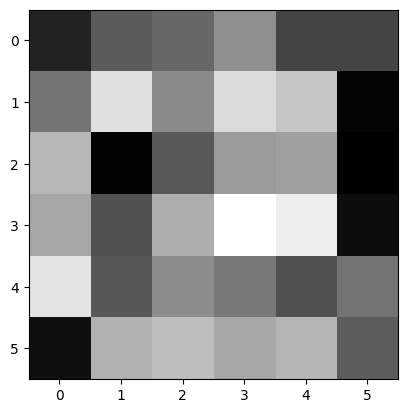

In [7]:
from matplotlib.gridspec import GridSpec

# Armamos una matriz de enteros random entre 0 y 255
img_test = np.random.randint(0, 255, size=(6, 6))

# Ploteamos
plt.imshow(img_test, cmap='gray')

In [8]:
# Podemos leer imagenes directamente de un archivo a una matriz de numpy
img_path = './super_mario.jpg'
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)
image.shape

# Podemos usar la imagen original a color, por simplicidad nos quedamos con grises
#image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB)

(575, 570)

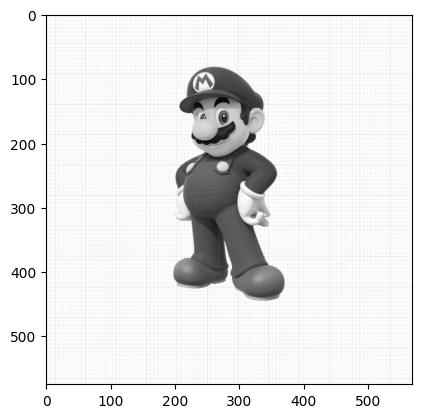

In [9]:
plt.imshow(image, cmap='gray')

## Escalado de imágenes


Queremos escalar/estirar una imagen. Una idea intuitiva podría ser aplicarle una transformación lineal que escale la grilla de sus coordenadas. De esta forma un pixel con intensidad $p$ y coordenada $(i,j)$ es trasladado a la posición $T(i,j)$. Luego, seteamos la intesidad de $T(i,j)$ con el mismo valor $p$.

### Direct mapping

📔 Resolver:

a) Implementar la estrategia anterior para escalar una imagen dado un factor de escala. No utilizar operaciones de numpy para este caso

b) Repetir lo anterior utilizando multiplicación matricial de numpy (ver [np.dot](https://numpy.org/doc/2.1/reference/generated/numpy.dot.html))

c) Comparar los tiempos de ejecución de ambos algoritmos tomando la media de varias corridas (ver  [timeit](https://docs.python.org/es/3.13/library/timeit.html)). Discutir posibles explicaciones para lo ocurrido.

d) Replicar c) pero activando [numba](https://numba.pydata.org/).

In [10]:
def scale(image, factor):
    h, w = image.shape[0], image.shape[1]
    new_h, new_w = int(h*factor), int(w*factor)

    if len(image.shape) > 2:
      size = (new_h, new_w, image.shape[2])
    else:
      size = (new_h, new_w)

    output = np.zeros(size, dtype=np.uint8)
    S = np.array([[factor, 0],
                 [0, factor]])

    output = np.zeros(size, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            new_x, new_y = (S@np.array([i,j])).flatten().astype(np.int16)
            output[new_x,new_y]=image[i,j]

    return output

@jit(nopython=True)
def scale_puro(image, factor):
    h, w = image.shape[0], image.shape[1]
    new_h, new_w = int(h*factor), int(w*factor)
    output = np.zeros((new_h, new_w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            new_x = factor*i
            new_y = factor*j
            output[new_x,new_y] = image[i,j]

    return output

In [11]:
%timeit -r 10 scale(img_test, 2)

46.5 μs ± 501 ns per loop (mean ± std. dev. of 10 runs, 10,000 loops each)


In [12]:
%timeit -r 10 scale_puro(img_test, 2)

286 ns ± 13.8 ns per loop (mean ± std. dev. of 10 runs, 1,000,000 loops each)


Veamos que pinta tiene el escalado sobre algunas imágenes

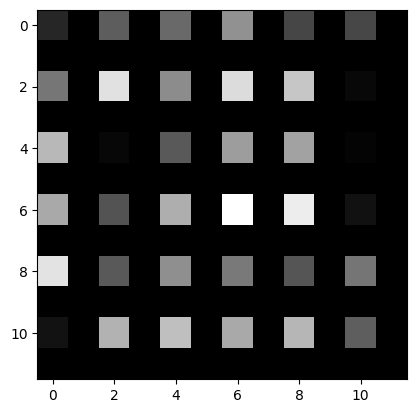

In [13]:
output = scale_puro(img_test,2)
plt.imshow(output, cmap='gray')
plt.show()

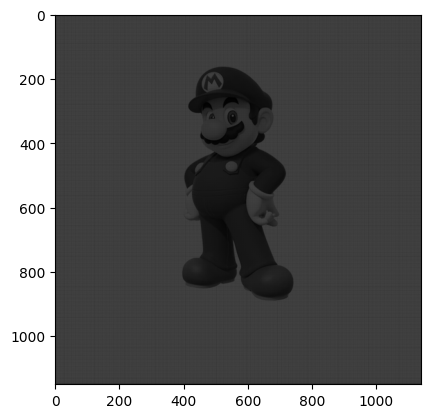

In [14]:
img_path = './super_mario.jpg'
factor = 2
# Leer img
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)

# Rotar
output = scale(image, factor)

# Plot
plt.imshow(image)
plt.imshow(output, cmap='gray')
plt.show()

libpng warning: iCCP: known incorrect sRGB profile


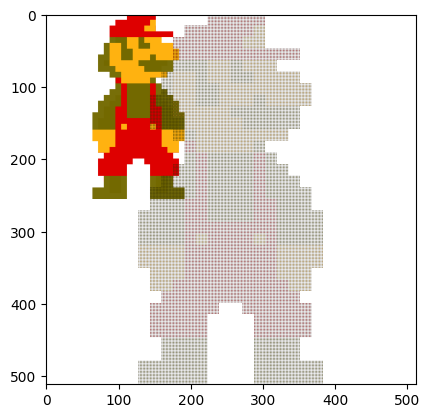

In [15]:
img_path = './mario.png'
factor = 2
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)
output = scale(image, factor)
plt.imshow(image)
plt.imshow(output, cmap='gray')
plt.show()

🧠 **Para pensar ahora:** Vemos que las imagenes tienen "huecos" al agrandarlas ¿a qué se debe este efecto indeseado?


### Inverse mapping

Una forma de evitar lo anterior es aprovechar que la transformación definida tiene inversa. En vez de recorrer el espacio de coordenadas original y aplicar $T$, podemos hacerlo al revés: nos paramos en el algún punto $p$ del espacio de llegada , le aplicamos la inversa de T obteniendo $p'$. Luego la intensidad de $p$ queda determinada por el valor de la de $p'$.

De esta forma nos aseguramos que a cada posición le corresponde otra del espacio original y no quedan "huecos".


📔 Resolver:

a) Implementar la estrategia anterior para escalar una imagen dado un factor de escala.

**Observación**: Es posible utilizar la funcion np.linalg.inv para halla la inversa (si existe). Sin embargo, en este caso es más directo pensar como quedaría la inversa de T dado que es una matriz diagonal.


In [16]:
#@jit(nopython=True)
def scale_inverse(image, factor):
    h, w = image.shape[0], image.shape[1]
    new_h, new_w = int(h*factor), int(w*factor)
    if len(image.shape) > 2:
      size = (new_h, new_w, image.shape[2])
    else:
      size = (new_h, new_w)

    output = np.zeros(size, dtype=np.uint8)
    S = np.array([[1/factor, 0],[0, 1/factor]])
    for i in range(new_h):
        for j in range(new_w):
            old_x, old_y = (S@np.array([i,j])).flatten().astype(np.int16)
            if 0 <= old_x < h and 0 <= old_y < w and old_x>=0 and old_y>=0:
                output[i,j]=image[old_x,old_y]

    return output

libpng warning: iCCP: known incorrect sRGB profile


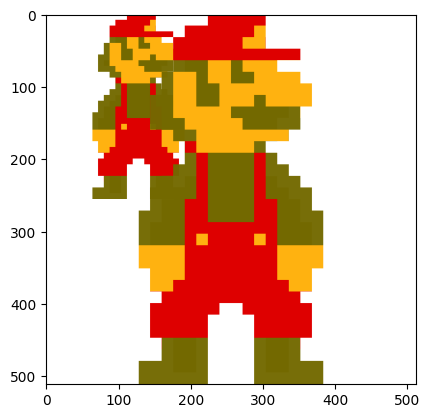

In [17]:
img_path = './mario.png'
factor = 2
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)
output = scale_inverse(image, factor)
plt.imshow(image)
plt.imshow(output)
plt.show()

🧠 **Para pensar ahora:** La imagen ya no tiene huecos pero, ¿que podría decirse de la "calidad" obtenida con esta técnica? Poner especial atención en los bordes


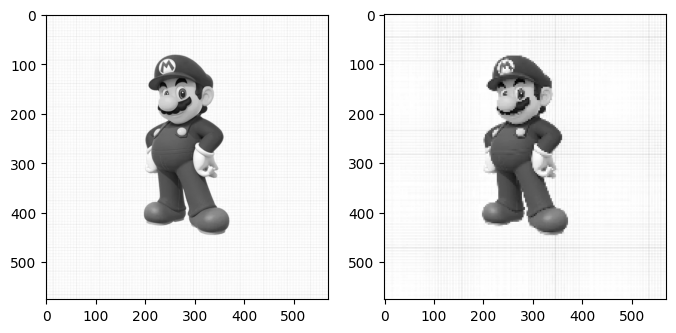

In [18]:
img_path = './super_mario.jpg'
factor = 3
# Read img
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)
image_downsampled = image[::factor,::factor]
# Rotate
output = scale_inverse(image_downsampled, factor)

# Plot
fig, ax = plt.subplots(1,2, figsize=(8, 10))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

**Observación**: Es posible conseguir mejores resultados utilizando otras técnicas que escapan al scope de este taller. Una de ellas es tomar un promedio pesado de la intensidad de los vecinos de $p'$ para determinar el valor de $p$ (ver bilinear interpolation)

# Rotación de imagenes

Tomando una idea parecida a la usada inicialmente para escalar una imagen mediante direct mapping, podemos simplemente considerar una transformación que rote las coordenadas y aplicarla a la imagen.

Sin embargo, hay que tener presente que la transformación que definimos lo hace con **respecto al origen de coordenadas**, que en las imágenes quedaría arriba a la izquierda. Necesitamos:

* Trasladar el origen del espacio de coordenadas al centro de la imagen primero.
* Aplicar la transformación de rotación conocida
* Restablecer el origen de coordenadas

Finalmente, es posible que para algunos ángulos la imagen rotada no entre en la grilla original. Por lo tanto, se suele agrandar lo suficiente el tamaño de la imagen de salida.



## Rotación matricial


📔 Resolver:

a) Implementar la estrategia anterior para rota una imagen dado ángulo $\theta$. Pueden considerar el esquema de código más abajo que utiliza loops, pero sugerimos pensar como sería la variante evitándolos.

b) Implementar la rotación de imágenes utilizando matrices de rotación afin


In [19]:
# Función que puede ser util para empezar a pensar como evitar loops
def meshgrid(x, y):
    A = np.empty(shape=(2,x.size*y.size))
    for j in range(y.size):
        for k in range(x.size):
            A[0,j*y.size + k] = x[k]
            A[1,j*y.size + k] = y[j]

    return A
h, w = 100, 100
A = meshgrid(np.linspace(0, h-1, h), np.linspace(0,w-1,w))
A

array([[ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  0.,  0., ..., 99., 99., 99.]])

In [22]:
#@jit(nopython=True)
def rotate(image, angle):

    angle = math.radians(angle)
    cos, sin = np.cos(angle), np.sin(angle)
    h, w = image.shape[0], image.shape[1]

    # La nueva imagen debería ser más grande para que la rotación tenga suficiente lugar
    new_h = int(np.round(np.abs(image.shape[0]*cos)+np.abs(image.shape[1]*sin))+1)
    new_w = int(np.round(np.abs(image.shape[1]*cos)+np.abs(image.shape[0]*sin))+1)

    original_centre = np.array([np.round(((h+1)/2)-1), np.round(((w+1)/2)-1)])
    new_centre = np.array([np.round(((new_h+1)/2)-1), np.round(((new_w+1)/2)-1)])

    # Por si la imagen es a color
    if len(image.shape) > 2:
      size = (new_h, new_w, image.shape[2])
    else:
      size = (new_h, new_w)

    output = np.zeros(size, dtype=np.uint8)
    mesh_2xn = meshgrid(image[0], image[1])
    coords = np.vstack((mesh_2xn, np.ones(mesh_2xn.shape[1])))


    # Matriz R de rotacion
    R_ext = np.array([[cos, -sin, 0],
                      [sin, cos, 0],
                      [0, 0, 1]])
    
    centrar = np.array([[1,0,-original_centre[0]],
                         [0,1,-original_centre[1]],
                          [0,0,1]])
    
    re_centrar = np.array([[1,0,new_centre[0]],
                           [0,1,new_centre[1]],
                           [0,0,1]])

    # tengo que hacer un coords.reshape(-1,3)?
    resultado = re_centrar @ (R_ext @ (centrar @ coords))
    resultado = np.round(resultado).astype(np.int16)
    x_coords = resultado[0]
    y_coords = resultado[1]

    mesh_img = np.meshgrid(image[0,:], image[:,0])
    print(mesh_img[0].dtype)

    valid_coords_mask = (x_coords >= 0) & (x_coords < h) & (y_coords >= 0) & (y_coords < w)

    output[x_coords[valid_coords_mask], y_coords[valid_coords_mask]] = image[mesh_img[0][valid_coords_mask], mesh_img[1][valid_coords_mask]]

  
    return output

In [23]:
img_path = './super_mario.jpg'
angle = 15
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)

# Rotate
output = rotate(image, angle)

# Plot
fig, ax = plt.subplots(1,2, figsize=(8, 10))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

uint8


/var/folders/0p/nzkrm49j2pj3s7g4_lftpj4c0000gn/T/ipykernel_14924/2353401076.py:40: RuntimeWarning: divide by zero encountered in matmul
  resultado = re_centrar @ (R_ext @ (centrar @ coords))
/var/folders/0p/nzkrm49j2pj3s7g4_lftpj4c0000gn/T/ipykernel_14924/2353401076.py:40: RuntimeWarning: overflow encountered in matmul
  resultado = re_centrar @ (R_ext @ (centrar @ coords))
/var/folders/0p/nzkrm49j2pj3s7g4_lftpj4c0000gn/T/ipykernel_14924/2353401076.py:40: RuntimeWarning: invalid value encountered in matmul
  resultado = re_centrar @ (R_ext @ (centrar @ coords))


IndexError: boolean index did not match indexed array along axis 0; size of axis is 575 but size of corresponding boolean axis is 324900

🧠 **Para pensar ahora:** La imagen rotada tiene los famoso "huecos". ¿Por qué?


## Rotación mediante shears

Una técnica que logra minimizar el problema de los huecos en la rotación utiliza únicamente composición de shears para lograrlo.

Si consideramos la aplicación sucesiva de 3 shears arbitrarios tales que sean equivalentes a la matriz de rotación:

$$
\begin{bmatrix}
1 & \alpha \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
\beta & 1
\end{bmatrix}
\begin{bmatrix}
1 & \gamma \\
0 & 0
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$




📔 Resolver (papel):

a) Verificar que $\alpha = \gamma = \frac{cos - 1}{sen}$ y $\beta = sin$

**Observación**: Dado que $\frac{cos-1}{sen}$ puede ser inestable cerca del 0 (**wild cancelación catastrófica appears!**), se prefiere utilizar $\frac{-tan}{2}$

b) Implementar dos funciones para aplicar un shear, vertical y otro horizontal, a una imagen